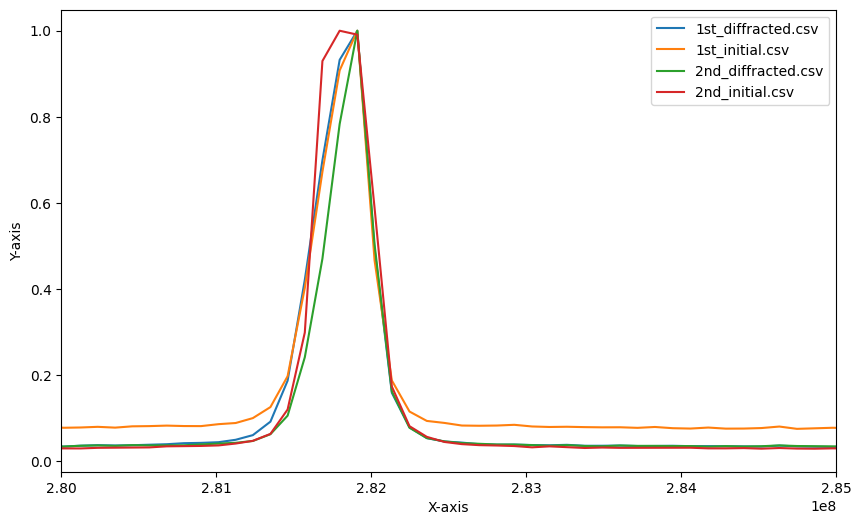

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def wavelength_to_frequency(wavelength_nm):
    # Speed of light in m/s
    c = 3e8
    # Convert wavelength from nm to meters
    wavelength_m = wavelength_nm * 1e-9
    # Calculate frequency in Hz
    frequency_hz = c / wavelength_m
    # Convert Hz to MHz
    frequency_mhz = frequency_hz / 1e6
    return frequency_mhz

folder_path = r"Z:\AOM beam spectrums"

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]


plt.figure(figsize=(10, 6))


for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    df = pd.read_csv(file_path)

    wavelength = df.iloc[:, 0] # first column
    frequency = wavelength_to_frequency(wavelength)
    count = df.iloc[:, 1] # second column
    count_norm = count/np.max(count)
    
    plt.plot(frequency, count_norm, label=csv_file)

plt.xlim(0.28*1e9,0.285*1e9)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best')

plt.show()





I'm gonna retake the data bc it's crap lol one sec

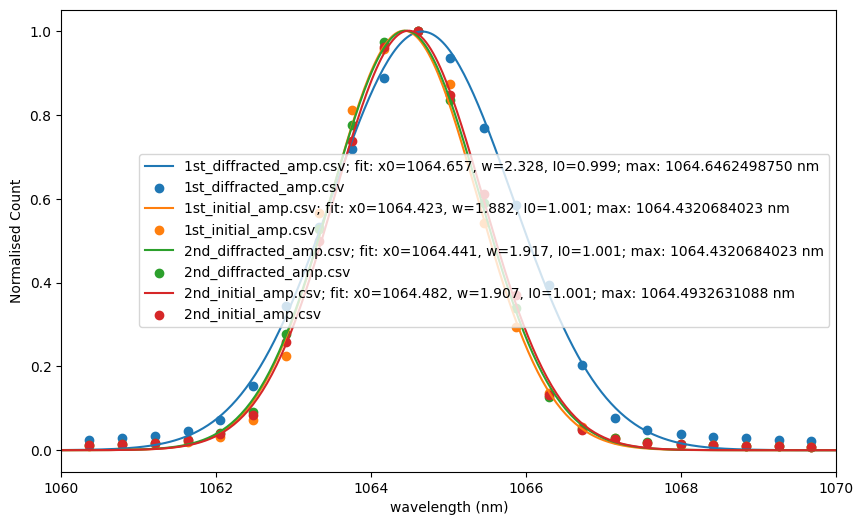

1st_diffracted_amp.csv: 1064.6462498749956nm = 281783738.0587441MHz
1st_initial_amp.csv: 1064.43206840228nm = 281840437.64324206MHz
2nd_diffracted_amp.csv: 1064.43206840228nm = 281840437.64324206MHz
2nd_initial_amp.csv: 1064.4932631087702nm = 281824235.43374354MHz


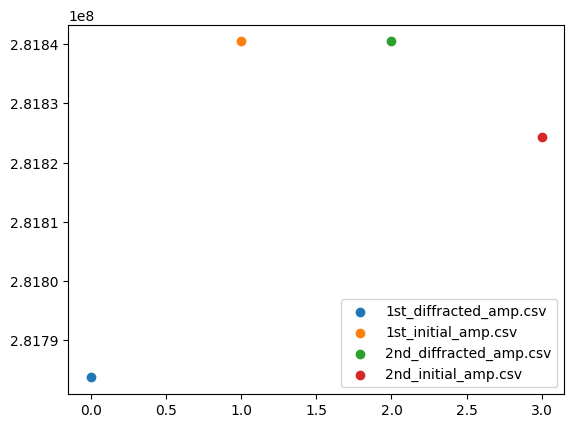

diff between 1st init and 2nd diff: 0.0000000000MHz
diff between 1st init and 1st diff: 56699.5844979882MHz
diff between 2nd init and 2nd diff: -16202.2094985247MHz


In [94]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def wavelength_to_frequency(wavelength_nm):
    # Speed of light in m/s
    c = 3e8
    # Convert wavelength from nm to meters
    wavelength_m = wavelength_nm * 1e-9
    # Calculate frequency in Hz
    frequency_hz = c / wavelength_m
    # Convert Hz to MHz
    frequency_mhz = frequency_hz / 1e6
    return frequency_mhz

def Gaussian(x,x0,w,I0):
    return I0*np.exp( -2*((x-x0)**2)/(w**2) )

folder_path = r"Z:\AOM beam spectrums (amplified)"

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]


plt.figure(figsize=(10, 6))

maxes_w = []
maxes_f = []
csv_names = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    df = pd.read_csv(file_path)

    # raw data
    wavelength = df.iloc[:, 0] # first column
    frequency = wavelength_to_frequency(wavelength)
    frequency = np.array(frequency)
    wavelength = np.array(wavelength)
    count = df.iloc[:, 1] # second column
    noise = np.mean(count[0:200])
    count = count - noise

    count_norm = count/np.max(count)
    freq_cont = np.linspace(frequency[0],frequency[-1],30000)
    wav_cont = np.linspace(wavelength[0], wavelength[-1], 30000)

    mid_rng_f = np.linspace(frequency[np.argmax(count_norm)]-0.01e8, frequency[np.argmax(count_norm)]+0.01e8,1000)
    mid_rng_w = np.linspace(wavelength[np.argmax(count_norm)]-10, wavelength[np.argmax(count_norm)]+10,1000)

    # fit gaussian to get max
    popt, pcov = curve_fit(Gaussian, wavelength, count_norm, bounds=([mid_rng_w[0], 0, 0.999], [mid_rng_w[-1], 100, 1.001]))
    fit = Gaussian(wav_cont, *popt)
    max_w = wav_cont[np.argmax(fit)]
    max_f = wavelength_to_frequency(max_w)

    maxes_w.append(max_w)
    maxes_f.append(max_f)
    csv_names.append(csv_file)


    plt.plot(wav_cont, fit,
         label='{}; '.format(csv_file) + 'fit: x0=%5.3f, w=%5.3f, I0=%5.3f; ' % tuple(popt) + 'max: %5.10f nm' % max_w)
    
    plt.scatter(wavelength, count_norm, label=csv_file)

plt.xlim(1060,1070)
plt.xlabel('wavelength (nm)')
plt.ylabel('Normalised Count')
plt.legend(loc='best')

plt.show()

for i in range(len(csv_names)):
    plt.scatter(i, maxes_f[i], label=csv_names[i])
    print('{}: {}nm = {}MHz'.format(csv_names[i], maxes_w[i],maxes_f[i]))
plt.legend()

plt.show()

print('diff between 1st init and 2nd diff: {:.10f}MHz'.format(maxes_f[2]-maxes_f[1]))
print('diff between 1st init and 1st diff: {:.10f}MHz'.format(maxes_f[1]-maxes_f[0]))
print('diff between 2nd init and 2nd diff: {:.10f}MHz'.format(maxes_f[3]-maxes_f[2]))



